In [ ]:
# !pip install namaLibrary

## Disarankan menjalankan program dengan Google Colab

In [1]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

## 1. Import Data

In [5]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):

          img = Image.open(os.path.join(directory, filename))
          img = img.resize((224, 224))
          img = img.convert('RGB')
          img = np.array(img) / 255.0
          images.append(img)
    return images

In [6]:
tumor_images = load_images('/content/drive/MyDrive/Colab /Youtube/CNN/ImageClassification/Vid2/project/data/yes')
no_tumor_images = load_images('/content/drive/MyDrive/Colab /Youtube/CNN/ImageClassification/Vid2/project/data/no')

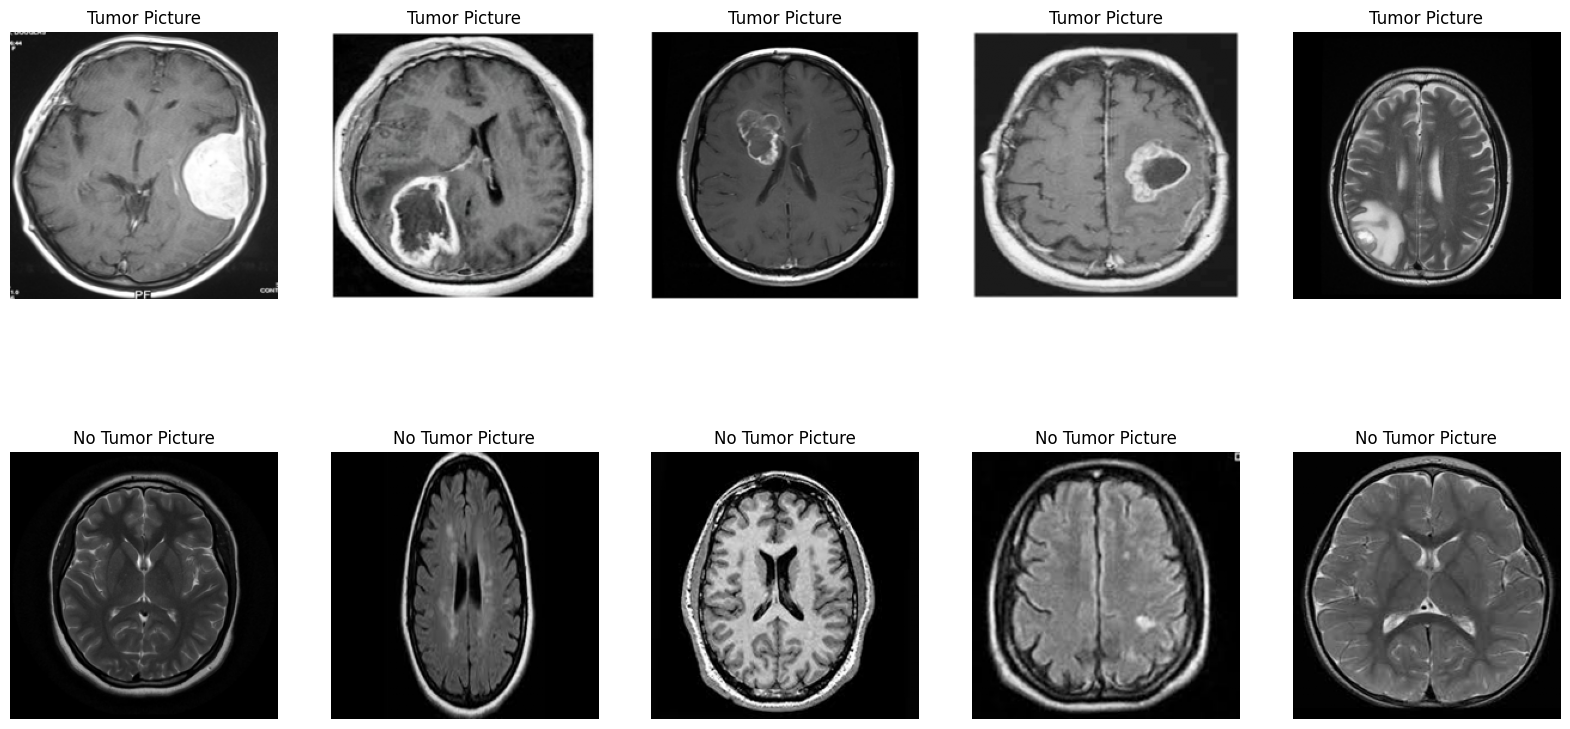

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
    axes[0, i].imshow(tumor_images[i])
    axes[0, i].set_title('Tumor Picture')
    axes[0, i].axis('off')

for i in range(5):
    axes[1, i].imshow(no_tumor_images[i])
    axes[1, i].set_title('No Tumor Picture')
    axes[1, i].axis('off')

plt.show()

In [8]:
type(tumor_images)

list

In [9]:
len(tumor_images)

155

In [10]:
len(no_tumor_images)

98

In [11]:
tumor_images

[array([[[0.48627451, 0.48627451, 0.48627451],
         [0.05490196, 0.05490196, 0.05490196],
         [0.07843137, 0.07843137, 0.07843137],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08627451, 0.08627451, 0.08627451]],
 
        [[0.49411765, 0.49411765, 0.49411765],
         [0.08627451, 0.08627451, 0.08627451],
         [0.0745098 , 0.0745098 , 0.0745098 ],
         ...,
         [0.08627451, 0.08627451, 0.08627451],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],
 
        [[0.46666667, 0.46666667, 0.46666667],
         [0.49803922, 0.49803922, 0.49803922],
         [0.09803922, 0.09803922, 0.09803922],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.07843137, 0.07843137, 0.07843137]],
 
        ...,
 
        [[0.23529412, 0.23529412, 0.23529412],
         [0.36470588, 0.36470588, 0.36470

## 2. Labeling

In [12]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [13]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [14]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
type(tumor_labels)

numpy.ndarray

In [16]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [17]:
data

[array([[[0.48627451, 0.48627451, 0.48627451],
         [0.05490196, 0.05490196, 0.05490196],
         [0.07843137, 0.07843137, 0.07843137],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08627451, 0.08627451, 0.08627451]],
 
        [[0.49411765, 0.49411765, 0.49411765],
         [0.08627451, 0.08627451, 0.08627451],
         [0.0745098 , 0.0745098 , 0.0745098 ],
         ...,
         [0.08627451, 0.08627451, 0.08627451],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],
 
        [[0.46666667, 0.46666667, 0.46666667],
         [0.49803922, 0.49803922, 0.49803922],
         [0.09803922, 0.09803922, 0.09803922],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.07843137, 0.07843137, 0.07843137]],
 
        ...,
 
        [[0.23529412, 0.23529412, 0.23529412],
         [0.36470588, 0.36470588, 0.36470

In [18]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
data[0].shape

(224, 224, 3)

## 3. Spliting Data

In [20]:
X = np.array(data)
y = np.array(labels)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

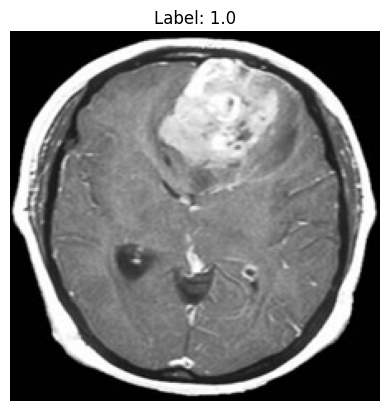

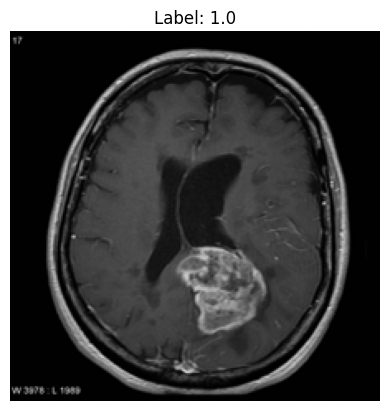

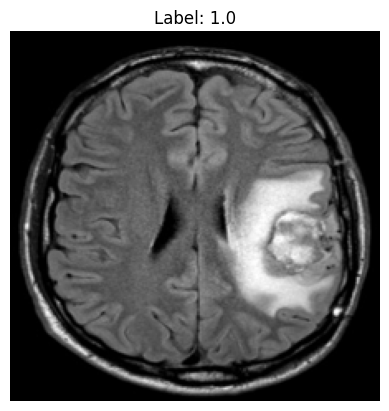

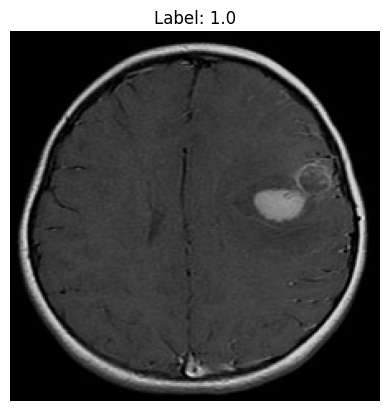

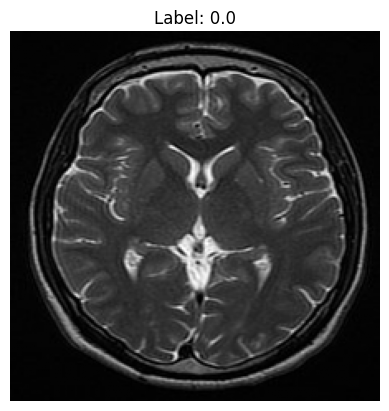

In [23]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title('Label: {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [24]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [25]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

## 4. Training Data

In [26]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 256)               100933888 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 1)

Epoch 1/10
6/6 [==============================] - 21s 3s/step - loss: 10.5630 - accuracy: 0.5989 - val_loss: 3.0424 - val_accuracy: 0.8000
Epoch 2/10
6/6 [==============================] - 18s 3s/step - loss: 2.3997 - accuracy: 0.7198 - val_loss: 0.4761 - val_accuracy: 0.8000
Epoch 3/10
6/6 [==============================] - 18s 3s/step - loss: 1.7310 - accuracy: 0.7033 - val_loss: 1.6639 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 18s 3s/step - loss: 0.5690 - accuracy: 0.8407 - val_loss: 0.2330 - val_accuracy: 0.9000
Epoch 5/10
6/6 [==============================] - 18s 3s/step - loss: 0.3767 - accuracy: 0.8516 - val_loss: 0.3679 - val_accuracy: 0.9000
Epoch 6/10
6/6 [==============================] - 18s 3s/step - loss: 0.2228 - accuracy: 0.9121 - val_loss: 0.0985 - val_accuracy: 0.9500
Epoch 7/10
6/6 [==============================] - 18s 3s/step - loss: 0.0986 - accuracy: 0.9725 - val_loss: 0.0631 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=================

In [30]:
evaluation = model.evaluate(test)

2/2 [==============================] - 1s 321ms/step - loss: 0.7903 - accuracy: 0.8431


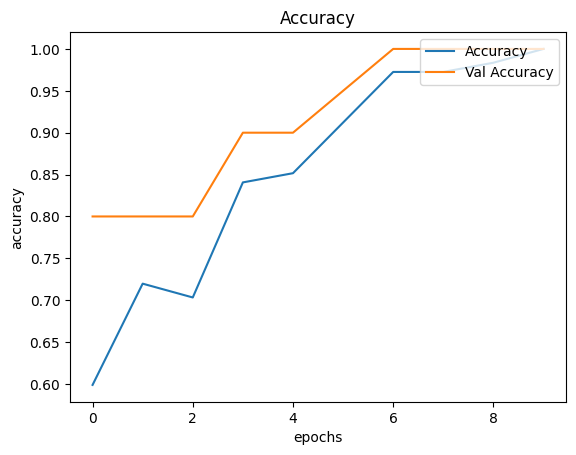

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

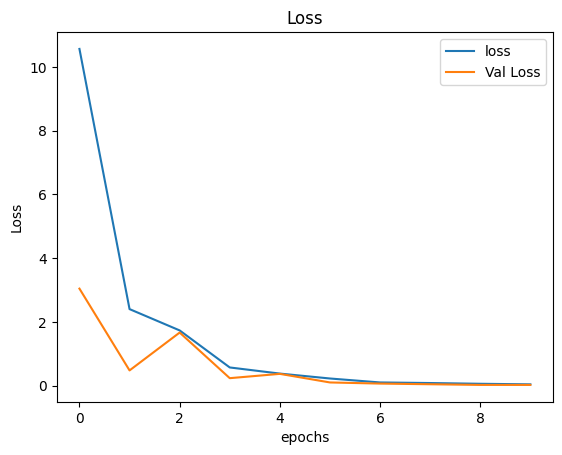

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# model.save("/content/drive/MyDrive/Colab /Youtube/CNN/ImageClassification/Vid2/project/tumor_otak.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5. Testing

In [33]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return "Tumor detected"
    else:
        return "No tumor detected"

Saving Y20.jpg to Y20.jpg


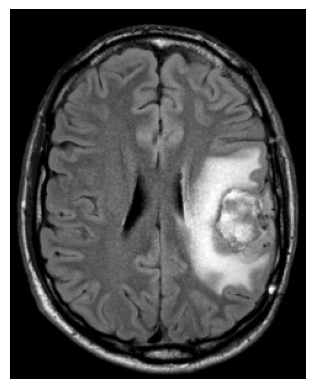

1/1 [==============================] - 0s 107ms/step
Tumor detected


In [35]:
# model = load_model("/content/drive/MyDrive/Colab /Youtube/CNN/ImageClassification/Vid2/project/tumor_otak.h5")

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)